<a href="https://colab.research.google.com/github/DangKien22/Check_de3/blob/main/UngDung__LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/driver')

Drive already mounted at /content/driver; to attempt to forcibly remount, call drive.mount("/content/driver", force_remount=True).


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [13]:
data = pd.read_csv('/content/driver/My Drive/Data/AAPL.csv')
data_end = int(np.floor(0.8*(data.shape[0])))
train = data[0:data_end]['Open']
train =train.values.reshape(-1)
test = data[data_end:]['Open'].values.reshape(-1)
date_test = data[data_end:]['Date'].values.reshape(-1)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.251438,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.643705,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.181007,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.202665,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.320070,283192000
...,...,...,...,...,...,...,...
1481,2021-11-18,153.710007,158.669998,153.050003,157.869995,157.869995,137827700
1482,2021-11-19,157.649994,161.020004,156.529999,160.550003,160.550003,117147500
1483,2021-11-22,161.679993,165.699997,161.000000,161.020004,161.020004,117467900
1484,2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900


In [16]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [17]:
x_train, y_train, x_test, y_test, date_test = get_data(train,test,30,1, date_test)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,30)

x_train = scaler.fit_transform(x_train)
y_train = scaler.fit_transform(y_train)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,30)

x_test = scaler.fit_transform(x_test)
y_test = scaler.fit_transform(y_test)

In [18]:
# Reshape lai cho dung model
x_train = x_train.reshape(-1,30,1)
y_train = y_train.reshape(-1,1)

#reshape lai cho test
x_test = x_test.reshape(-1,30,1)
y_test = y_test.reshape(-1,1)
date_test = date_test.reshape(-1,1)

In [20]:
model.fit(x_train, y_train, epochs=500, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/Data/30_to_1.h5')

Epoch 1/500
31/31 [==============================] - 7s 81ms/step - loss: 0.0053 - val_loss: 0.0182
Epoch 2/500
31/31 [==============================] - 2s 50ms/step - loss: 9.1356e-04 - val_loss: 0.0103
Epoch 3/500
31/31 [==============================] - 2s 50ms/step - loss: 8.2495e-04 - val_loss: 0.0071
Epoch 4/500
31/31 [==============================] - 2s 53ms/step - loss: 7.5775e-04 - val_loss: 0.0068
Epoch 5/500
31/31 [==============================] - 2s 50ms/step - loss: 6.1223e-04 - val_loss: 0.0101
Epoch 6/500
31/31 [==============================] - 2s 50ms/step - loss: 7.1214e-04 - val_loss: 0.0116
Epoch 7/500
31/31 [==============================] - 1s 48ms/step - loss: 6.4169e-04 - val_loss: 0.0107
Epoch 8/500
31/31 [==============================] - 2s 50ms/step - loss: 5.8205e-04 - val_loss: 0.0058
Epoch 9/500
31/31 [==============================] - 2s 50ms/step - loss: 5.7655e-04 - val_loss: 0.0112
Epoch 10/500
31/31 [==============================] - 2s 49ms/step -

In [19]:
#dau vao 30 doan 1
n_input = 30
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

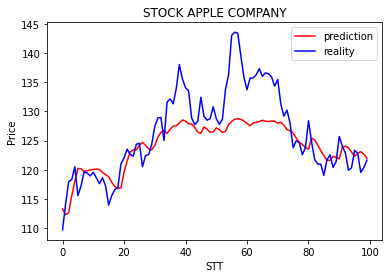

In [23]:
model = keras.models.load_model('/content/driver/My Drive/Data/30_to_1.h5')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2=scaler.inverse_transform(y_test)
plt.plot(test_1[:100], color='r')
plt.plot(test_2[:100] ,color='b')
plt.title("STOCK APPLE COMPANY")
plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [25]:
test_1 = scaler.inverse_transform(test_output)
test_2=scaler.inverse_transform(y_test)